In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType,BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/ball_by_ball.csv")

display(ball_by_ball_df.limit(5))

match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,wides,legbyes,byes,noballs,penalty,bowler_extras,out_type,caught,bowled,run_out,lbw,retired_hurt,stumped,caught_and_bowled,hit_wicket,obstructingfeild,bowler_wicket,match_date,season,striker,non_striker,bowler,player_out,fielders,striker_match_sk,strikersk,nonstriker_match_sk,nonstriker_sk,fielder_match_sk,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk
598028,15,6,1,5,2,6,No Extras,4,0,0,0,0,0,0,0,Not Applicable,false,false,false,false,false,false,false,false,false,false,2013-04-20,2013,277,104,83,null,null,20336,276,20333,103,-1,-1,20343,82,-1,4,1,false,0,2013-04-20
598028,14,1,1,5,2,5,No Extras,1,0,0,0,0,0,0,0,Not Applicable,false,false,false,false,false,false,false,false,false,false,2013-04-20,2013,104,6,346,null,null,20333,103,20328,5,-1,-1,20348,345,-1,4,1,false,0,2013-04-20
598028,14,2,1,5,2,3,No Extras,1,0,0,0,0,0,0,0,Not Applicable,false,false,false,false,false,false,false,false,false,false,2013-04-20,2013,6,104,346,null,null,20328,5,20333,103,-1,-1,20348,345,-1,4,1,false,0,2013-04-20
598028,14,3,1,5,2,5,No Extras,1,0,0,0,0,0,0,0,Not Applicable,false,false,false,false,false,false,false,false,false,false,2013-04-20,2013,104,6,346,null,null,20333,103,20328,5,-1,-1,20348,345,-1,4,1,false,0,2013-04-20
598028,14,4,1,5,2,3,No Extras,0,0,0,0,0,0,0,0,Not Applicable,false,false,false,false,false,false,false,false,false,false,2013-04-20,2013,6,104,346,null,null,20328,5,20333,103,-1,-1,20348,345,-1,4,1,false,0,2013-04-20


In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # Using IntegerType for year
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/match.csv")

display(match_df.limit(5))

match_sk,match_id,team1,team2,match_date,season_year,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,win_type,outcome_type,manofmach,win_margin,country_id
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1
1,335988,Kings XI Punjab,Chennai Super Kings,2008-04-19,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1
2,335989,Delhi Daredevils,Rajasthan Royals,2008-04-19,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1
3,335990,Mumbai Indians,Royal Challengers Bangalore,2008-04-20,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1
4,335991,Kolkata Knight Riders,Deccan Chargers,2008-04-20,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1


In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(20, 2), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True), 
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/player_match.csv")

display(player_match_df.limit(5))

player_match_sk,playermatch_key,match_id,player_id,player_name,dob,batting_hand,bowling_skill,country_name,role_desc,player_team,opposit_team,season_year,is_manofthematch,age_as_on_match,isplayers_team_won,batting_status,bowling_status,player_captain,opposit_captain,player_keeper,opposit_keeper
-1,-1.00,-1,-1,N/A,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
12694,33598700006.00,335987,6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India,Captain,Royal Challengers Bangalore,Kolkata Knight Riders,2008,false,35,false,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha
12695,33598700007.00,335987,7,W Jaffer,1978-02-16,Right-hand bat,Right-arm offbreak,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,false,30,false,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha
12696,33598700008.00,335987,8,V Kohli,1988-11-05,Right-hand bat,Right-arm medium,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,false,20,false,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha
12697,33598700009.00,335987,9,JH Kallis,1975-10-16,Right-hand bat,Right-arm fast-medium,South Africa,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,false,33,false,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha


In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/player.csv")

display(player_df.limit(5))

player_sk,player_id,player_name,dob,batting_hand,bowling_skill,country_name
0,1,SC Ganguly,1972-07-08,Left-hand bat,Right-arm medium,India
1,2,BB McCullum,1981-09-27,Right-hand bat,Right-arm medium,New Zealand
2,3,RT Ponting,1974-12-19,Right-hand bat,Right-arm medium,Australia
3,4,DJ Hussey,1977-07-15,Right-hand bat,Right-arm offbreak,Australia
4,5,Mohammad Hafeez,1980-10-17,Right-hand bat,Right-arm offbreak,Pakistan


In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://stan-ipl-dataset/team.csv")

display(team_df.limit(5))

team_sk,team_id,team_name
0,1,Kolkata Knight Riders
1,2,Royal Challengers Bangalore
2,3,Chennai Super Kings
3,4,Kings XI Punjab
4,5,Rajasthan Royals


In [0]:
# Filter to inlcude only valid deliveries. Exclusing wides and noballs.

filtered_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))
filtered_df.show()

# Group by season and count valid deliveries

deliveries_per_season = (
    filtered_df.groupBy("season")
    .count()
    .orderBy("season")
)

# Collect to Pandas for plotting
pdf = deliveries_per_season.toPandas()




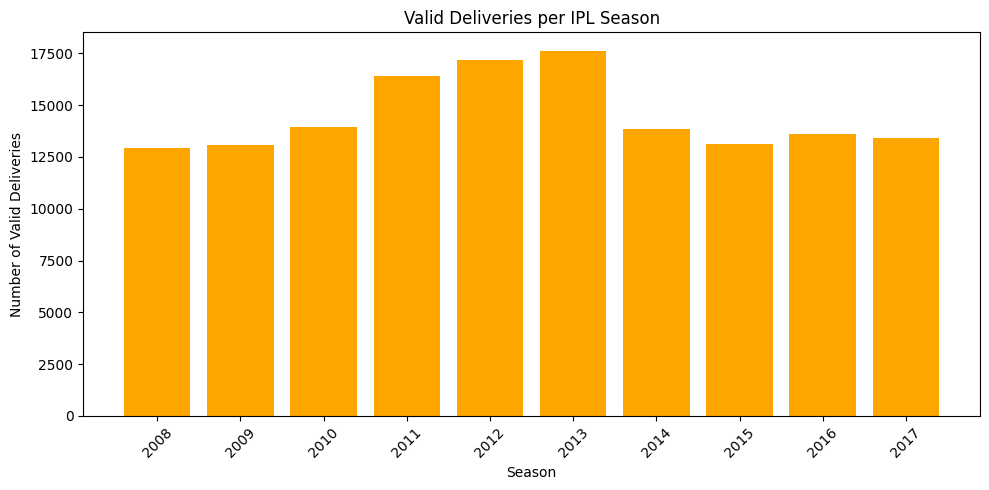

In [0]:
plt.figure(figsize=(10, 5))
plt.bar(pdf["season"].astype(str), pdf["count"], color="orange")
plt.xlabel("Season")
plt.ylabel("Number of Valid Deliveries")
plt.title("Valid Deliveries per IPL Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Aggregation: Caclulationg total and average runs scored in each match and innings

total_runs_avg = ball_by_ball_df.groupBy("match_id", "innings_no").agg(sum("runs_scored").alias ("total_runs"), avg("runs_scored").alias("avg_runs"))

total_runs_avg.show()

In [0]:
#Window function: Calculating running total of runs in each match for each over

running_total = Window.partitionBy("match_id").orderBy("over_id")
running_total_df = filtered_df.withColumn("running_total", sum("runs_scored").over(running_total))
# running_total_df.show()
display(running_total_df)